### Linear Algebra

#### Question 1 - General Least Squares 



Linear Model: 

$$ y = X\beta  + e$$

for Generalized Least Squares (GLS): $$ Var(e) = \Sigma $$ which accounts for heteroskedasticity i.e. diagonal elements in the covariance matrix are not equal and autocovariance between different lags (i.e. non-diagonal elements aren't zero) 



Since, above 2 assumptions aren't satisfied under Gauss Markov, the OLS estimator won't be BLUE (best linear unbiased estimator). Hence calculating GLS estimator using following methods:

#### 1. Method 1 

$$ Var(e) = \Sigma = \Sigma^{0.5} \Sigma^{0.5}$$

Because $\Sigma$ is Positive Definite (square symmetric & full-rank). Also, $\Sigma^{0.5}$ is also P.D. 

$$\Sigma^{ - 0.5} = (\Sigma^{0.5})^{-1} := \Sigma^{'}$$

If we pre-multiply the regression equation by $\Sigma^{'}$, we obtain

$$ \Sigma^{'}y = \Sigma^{'}X \beta + \Sigma^{'}e$$

Rewriting it as  $$\tilde{y} = \tilde{X} \beta + \tilde{e}$$

Now above equation satifies OLS assumptions, so the estimator for \beta will BLUE (Best Linear Unbiased Estimator) 

$$\hat{\beta_{GLS}} = (\tilde{X}^{T}\tilde{X})^{-1}\tilde{X}^{T}\tilde{y} = (X^{T}\Sigma^{'T}\Sigma^{'}X)^{-1}X^{T}\Sigma^{'T}\Sigma^{'}y$$

$$\hat{\beta_{GLS}} = (X^{T}\Sigma^{-1}X)^{-1}X^{T}\Sigma^{-1}y$$


#### Method 2 - Minimizing the Mahalonobis distance

In OLS we minimized: 

$$ arg min_{\beta} (\epsilon^T \epsilon) = arg min_{\beta} (y - X\beta)^T (y - X\beta)$$

However for GLS\WLS the wieghts are inversely proportional to the variances of the observations and hence the following equation needs to be minimized :

$$  arg min_{\beta} (y - X\beta)^T \Sigma^{-1}(y - X\beta)$$

$$ = y^T\Sigma^{-1}y - 2\beta^TX^T \Sigma^{-1}y - \beta^TX^T \Sigma^{-1}X\beta $$

Taking the derivative 

$$ 2X^T \Sigma^{-1}y - 2X^T \Sigma^{-1}X\beta = 0$$

$$\hat{\beta_{GLS}} = (X^{T}\Sigma^{-1}X)^{-1}X^{T}\Sigma^{-1}y$$

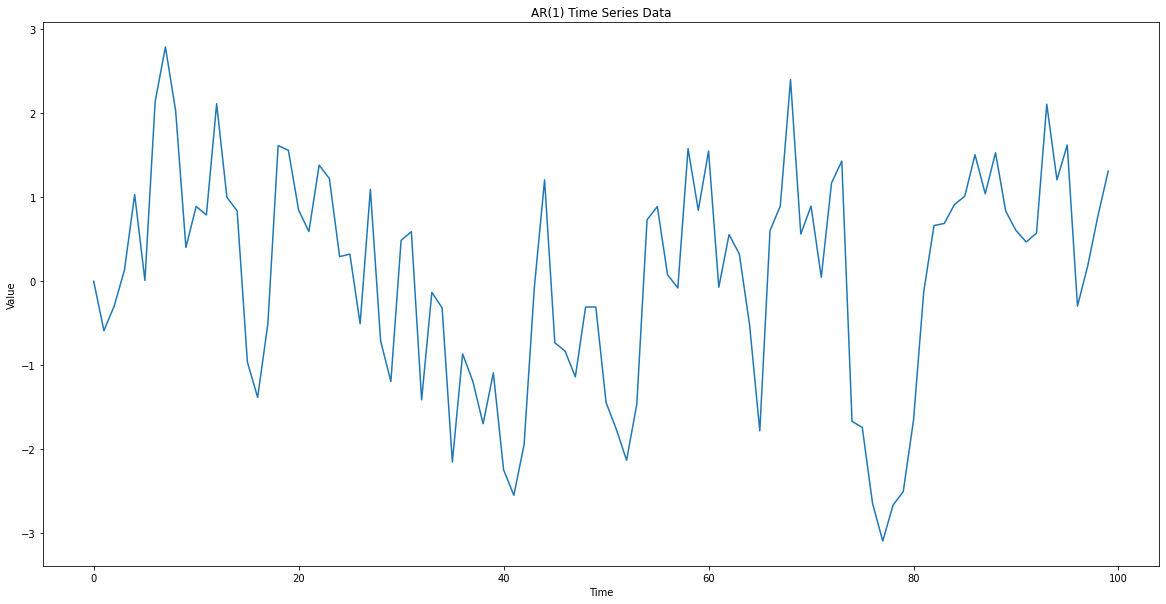

In [4]:


import numpy as np
import matplotlib.pyplot as plt


# Generating the data for AR(1) model

def generate_ar1(phi, sigma, n_samples):
    """
    Generate data from an AR(1) model.

    Parameters:
    phi (float): Autoregressive parameter
    sigma (float): Standard deviation of the white noise error
    n_samples (int): Number of samples to generate

    Returns:
    np.ndarray: Generated AR(1) time series data
    """
    # Generate white noise error terms
    epsilon = np.random.normal(0, sigma, n_samples)

    # Initialize the time series array
    ar1_data = np.zeros(n_samples)

    # Generate data using the AR(1) formula
    for t in range(1, n_samples):
        ar1_data[t] = phi * ar1_data[t-1] + epsilon[t]

    return ar1_data

# AR(1) parameters
phi = 0.7  # Autoregressive parameter
sigma = 1.0  # Standard deviation of the white noise error

# Number of samples to generate
n_samples = 100

# Generate AR(1) data
ar1_data = generate_ar1(phi, sigma, n_samples)

# Plot the generated AR(1) data
plt.figure(figsize=(20, 10))
plt.plot(ar1_data)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('AR(1) Time Series Data')
plt.show()

In [5]:
# Estimating the model using OLS

# Function to estimate phi using OLS
def estimate_phi_ols(data):
    X = data[:-1]  # Previous values (lag 1)
    y = data[1:]   # Current values
    X = np.column_stack((np.ones(len(X)), X))
    ols_estimates = np.linalg.inv(X.T @ X) @ X.T @ y
    return ols_estimates[1]  # Extract the autoregressive parameter (phi)

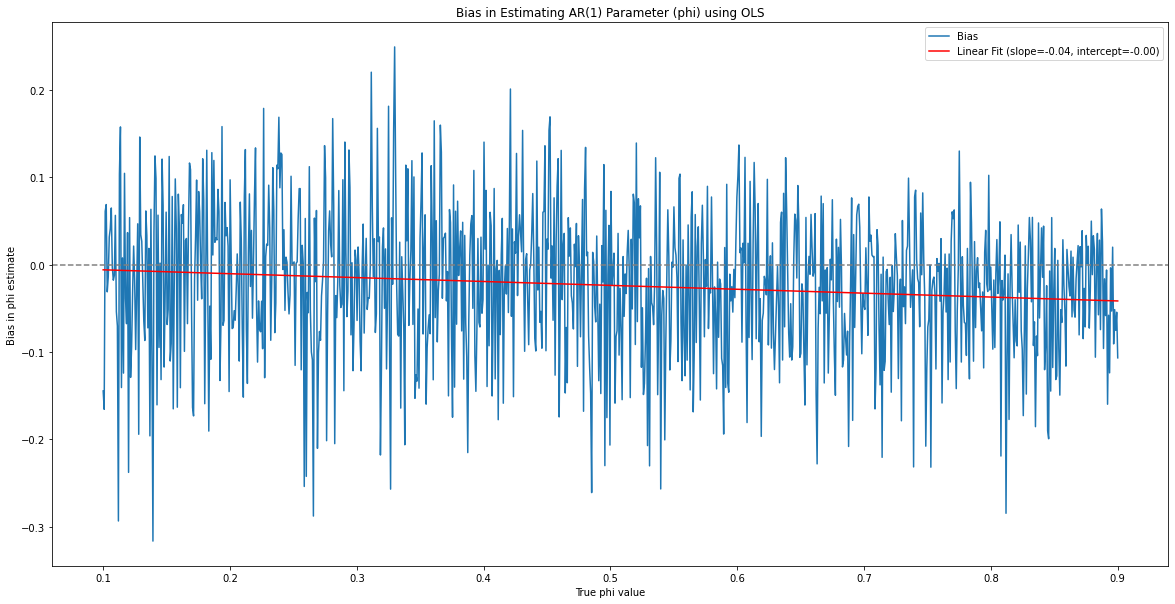

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Function to estimate phi using OLS
def estimate_phi_ols(data):
    X = data[:-1]  # Previous values (lag 1)
    y = data[1:]   # Current values
    X = np.column_stack((np.ones(len(X)), X))
    ols_estimates = np.linalg.inv(X.T @ X) @ X.T @ y
    return ols_estimates[1]  # Extract the autoregressive parameter (phi)

# Simulation parameters
num_simulations = 1000  # Number of simulations
phi_values = np.linspace(0.1, 0.9, num_simulations)  # True phi values to simulate

# Initialize arrays to store results
estimated_phi_values = np.zeros(num_simulations)

# Run the simulation
for i in range(num_simulations):
    # Generate AR(1) data with the current phi value
    ar1_data = generate_ar1(phi_values[i], sigma, n_samples)
    
    # Estimate phi using OLS
    estimated_phi_values[i] = estimate_phi_ols(ar1_data)

# Calculate the bias in phi estimates
bias = estimated_phi_values - phi_values

# Fit a linear regression to the bias and true phi values
slope, intercept, r_value, _, _ = linregress(phi_values, bias)

# Plot the bias in phi estimates and the linear fit
plt.figure(figsize = [20,10])
plt.plot(phi_values, bias, label='Bias')
plt.plot(phi_values, intercept + slope * phi_values, 'r', label=f'Linear Fit (slope={slope:.2f}, intercept={intercept:.2f})')
plt.axhline(y=0, color='gray', linestyle='--')
plt.xlabel('True phi value')
plt.ylabel('Bias in phi estimate')
plt.title('Bias in Estimating AR(1) Parameter (phi) using OLS')
plt.legend()
plt.show()
